<a href="https://colab.research.google.com/github/gomlfx/CodeSearchNet/blob/master/Mike_Smith_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline
#only for jupyter notebooks

In [0]:
plt.style.use('fast')
#fast is default. don't need to set

In [6]:
plt.style.available

['seaborn',
 'ggplot',
 'seaborn-talk',
 'seaborn-ticks',
 'Solarize_Light2',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-bright',
 'tableau-colorblind10',
 'bmh',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-whitegrid',
 'fast',
 'classic',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn-pastel',
 'seaborn-poster',
 '_classic_test',
 'seaborn-muted',
 'dark_background']

In [8]:
#read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [10]:
#cabin class is categorical; could be string or number.
df['cabin_class']=df['Pclass'].map({1:'first',2:'second',3:'third'})
df[['cabin_class','Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


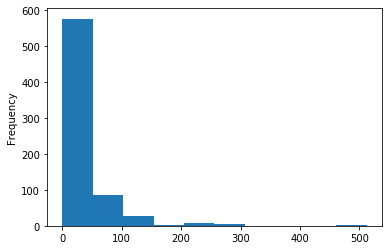

In [13]:
df['Fare'].plot(kind='hist');

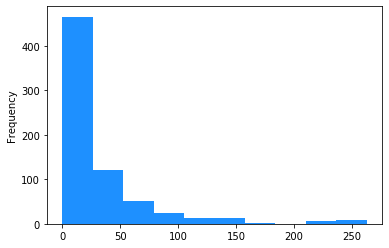

In [21]:
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [0]:
farebins=[0, 8, 15, 33, 512] 
farelabels=['low','med','high','vhigh']

df['fare_groups']=pd.cut(df['Fare'], bins=farebins, labels=farelabels)

In [28]:
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low      154
med      189
high     185
vhigh    174
Name: fare_groups, dtype: int64

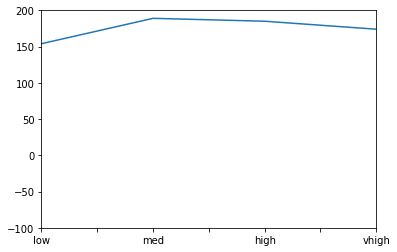

In [32]:
myresults.plot(ylim=(-100,200)); #ylim changes y range

(709, 8)
count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


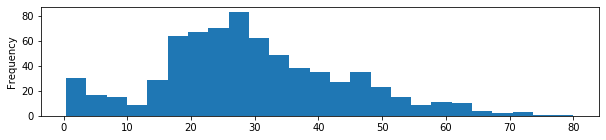

In [43]:
print(df.shape)
print(df['Age'].describe())
df['Age'].plot(kind='hist', bins=25, figsize=(10,2));

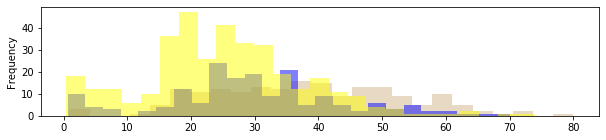

In [50]:
#this is the right way to show alpha bar charts
df[df['cabin_class']=='first']  ['Age'].plot(kind='hist', bins=25, figsize=(10,2), color='tan', alpha=0.5);
df[df['cabin_class']=='second']  ['Age'].plot(kind='hist', bins=25, figsize=(10,2), color='blue', alpha=0.5);
df[df['cabin_class']=='third']  ['Age'].plot(kind='hist', bins=25, figsize=(10,2), color='yellow', alpha=0.5);

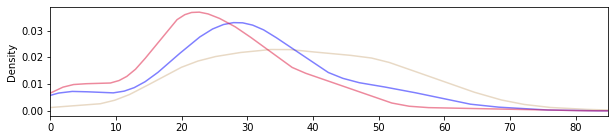

In [53]:
#but easier to read as KDE (kernel density estimate), note use of 'xlim'
df[df['cabin_class']=='first']  ['Age'].plot(kind='density', xlim=(0,85), figsize=(10,2), color='tan', alpha=0.5);
df[df['cabin_class']=='second']  ['Age'].plot(kind='density', xlim=(0,85), figsize=(10,2), color='blue', alpha=0.5);
df[df['cabin_class']=='third']  ['Age'].plot(kind='density', xlim=(0,85), figsize=(10,2), color='crimson', alpha=0.5);


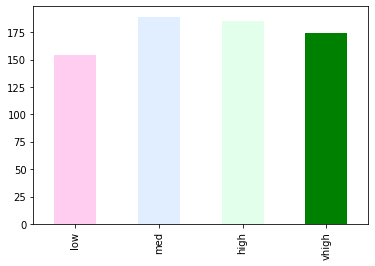

In [60]:
#how about showing a single variable?
myresults=df['fare_groups'].value_counts().sort_index()
myresults.plot(kind='bar', color=['#ffcdef','#e1eeff','#e1ffeb', 'green']);

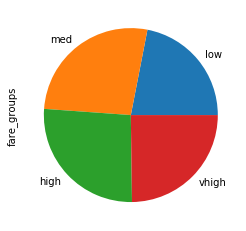

In [62]:
#pie
myresults.plot(kind='pie');

In [65]:
#contrast 2 categorical variables using crosstab
cab_death = pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


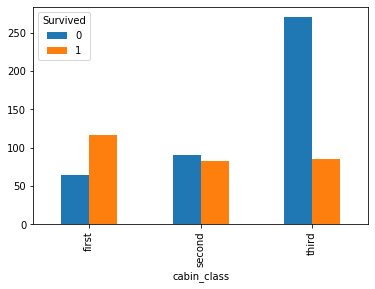

In [66]:
cab_death.plot(kind='bar');

In [67]:
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


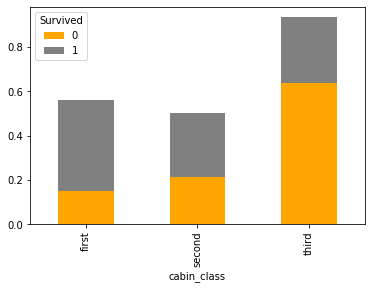

In [68]:
cab_death1.plot(kind='bar', stacked=True, color=['orange','gray']);

In [69]:
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


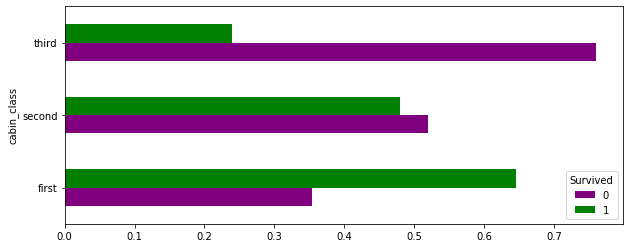

In [71]:
cab_death2.plot(kind='barh',figsize=(10,4),color=['purple','green']);

In [72]:
df['Age'].mean()

29.618011283497882

In [74]:
cab_age=df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

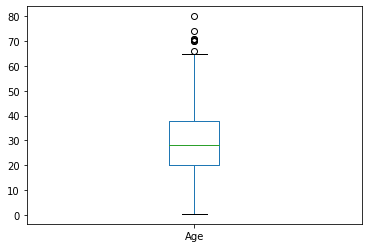

In [75]:
#boxplot?
df['Age'].plot(kind='box');

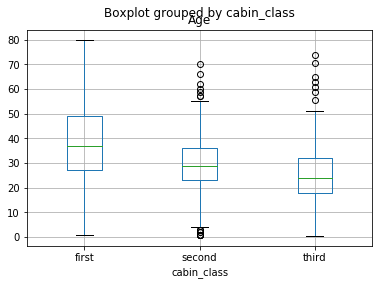

In [78]:
df.boxplot(column='Age', by='cabin_class');

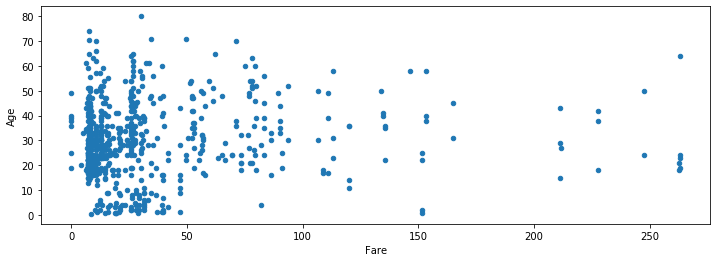

In [83]:
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

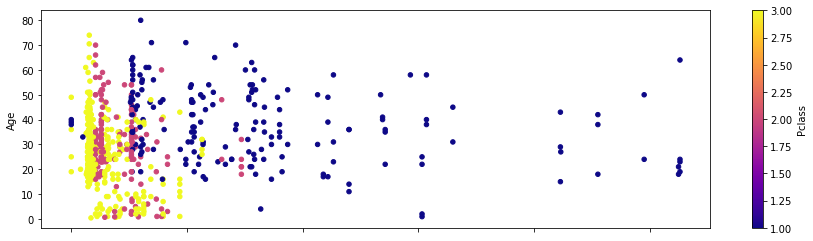

In [86]:
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

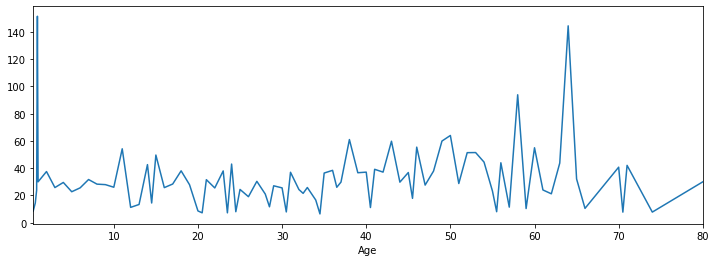

In [89]:
#line chart: often used to contrast time 
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

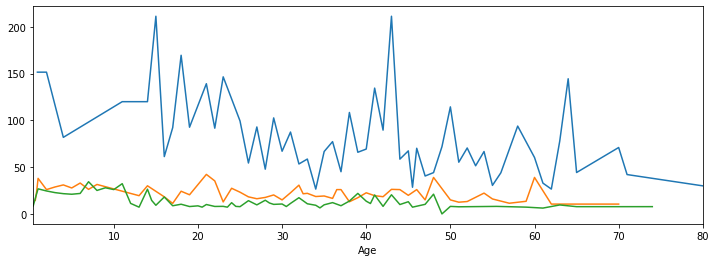

In [96]:
#age by fare and cabin class
mycolors=['crimson', 'purple','dodgerblue']
cab_classes=['first','second','third']
#loop through values
for x in [0,1,2]:
  df[df['cabin_class']==cab_classes[x]].groupby('Age')['Fare'].mean().plot(figsize=(12,4));

In [97]:
#correlation matrix
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


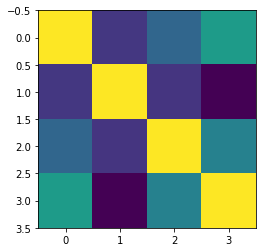

In [98]:
plt.imshow(corr_matrix);

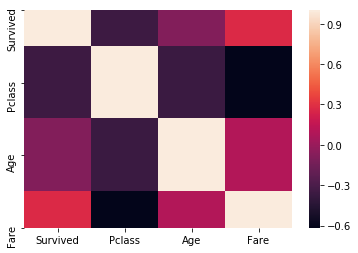

In [99]:
sns.heatmap(corr_matrix);

In [0]:
#matplotlib
x = np.linspace(0,5,11)
y = x ** 2

In [101]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [102]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

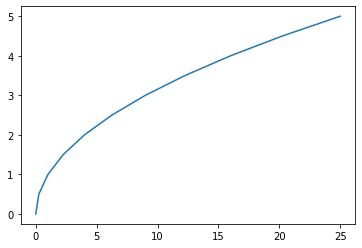

In [103]:
#simple plot to start off
plt.plot(y, x);

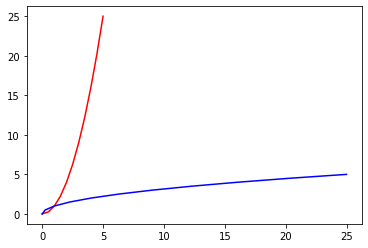

In [105]:
#can I put two plt plots together?
plt.plot(x,y, 'r');
plt.plot(y,x, 'b');

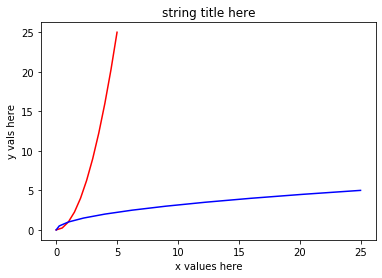

In [107]:
plt.plot(x,y, 'r')
plt.plot(y,x, 'b')
plt.xlabel('x values here')
plt.ylabel('y vals here')
plt.title('string title here');
#every line in matplotlib independently adds a feature

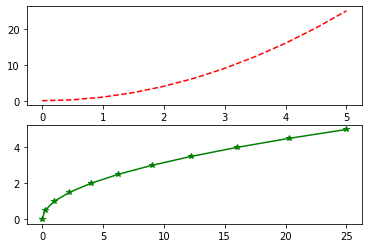

In [115]:
#so plt.subplot(nrows, ncols, plot_number)
plt.subplot(2,1,1)
plt.plot(x,y,'r--')
plt.subplot(2,1,2)
plt.plot(y,x,'g*-');

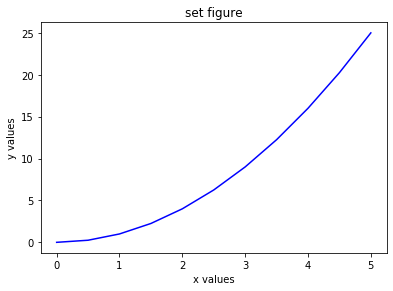

In [119]:
#the .figure() method
#create figure
fig = plt.figure()
#add set of axes to figure
axes = fig.add_axes([0.1,0.1,0.8,0.8])
#plot on that set of axes
axes.plot(x,y,'b')
axes.set_xlabel('x values')
axes.set_ylabel('y values')
axes.set_title('set figure');

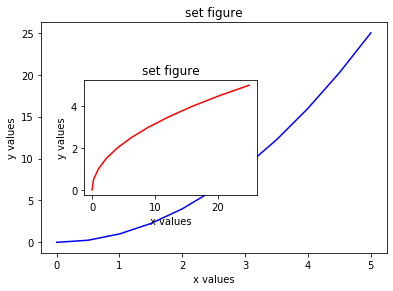

In [125]:
#the .figure() method
#create figure
fig = plt.figure()
#add set of axes to figure
axes1 = fig.add_axes([0.1,0.1,0.8,0.8]) #range 0 to 1 [left,bottom,width,height]
axes2 = fig.add_axes([0.2,0.3,0.4,0.4]) #[left,bottom,width,height]
#plot on that set of axes
axes1.plot(x,y,'b') #x vs y
axes1.set_xlabel('x values')
axes1.set_ylabel('y values')
axes1.set_title('set figure');

axes2.plot(y,x,'r') #y vs x
axes2.set_xlabel('x values')
axes2.set_ylabel('y values')
axes2.set_title('set figure');

Text(0.5, 17.200000000000003, 'x')

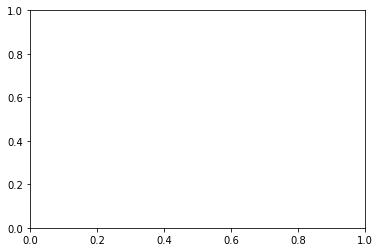

In [127]:
#plt.subplots
fig, ax = plt.subplots(nrows=1,ncols=1) #more concise than above function
axes.plot(x,y, 'darkred')
axes.set_xlabel('x')


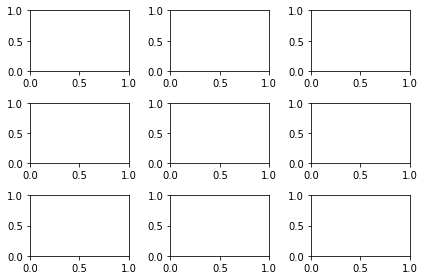

In [130]:
#plt.subplots
fig, ax = plt.subplots(nrows=3,ncols=3) #more concise than above function
fig

#use tight layout
plt.tight_layout()

In [131]:
axes #axes is numpy array of axes to plot on

In [158]:
#teacher said works with eyve's code
for ax in axes:
  for ax in a:
    ax.plot(x,y,'b')
    ax.set_xlabel('x vals')
    ax.set_ylabel('y')
    ax.set_title('title')

fig
#ask eyve about it

TypeError: ignored

In [134]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'title')

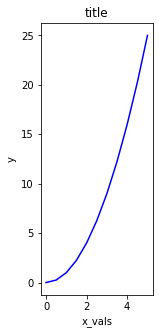

In [135]:
fig, axes = plt.subplots(figsize=(2,5))
axes.plot(x,y,'b')
axes.set_xlabel('x_vals')
axes.set_ylabel('y')
axes.set_title('title')

In [0]:
fig.savefig('myfile.png', dpi=200)

In [142]:
axes.set_title('title')


Text(0.5, 1, 'title')

In [141]:
axes.set_xlabel('values')

Text(0.5, 66.44444444444444, 'values')

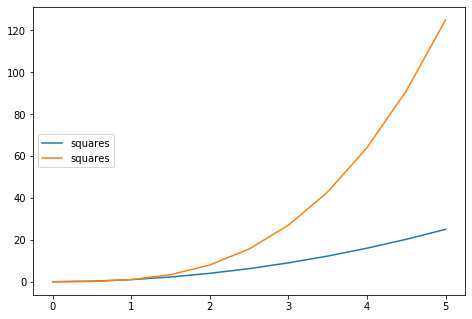

In [156]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,x**2,label='squares')
ax.plot(x,x**3,label='squares')
ax.legend(loc=6);

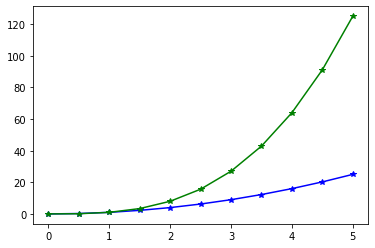

In [160]:
#matlab style
fig, ax = plt.subplots()

#blue line with dots
ax.plot(x,x**2,'b*-')
#green dashed line
ax.plot(x,x**3,'g*-');

In [0]:
#make sure to emply various line and marker styles section on the lecture notes.

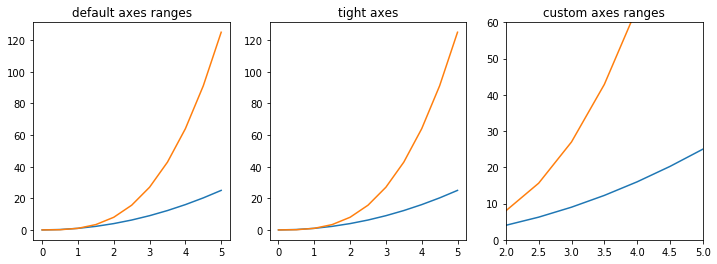

In [162]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
axes[0].plot(x,x**2,x,x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x,x**2,x,x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')

axes[2].plot(x,x**2,x,x**3)
axes[2].set_ylim([0,60])
axes[2].set_xlim([2,5])
axes[2].set_title('custom axes ranges');


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here